<a href="https://colab.research.google.com/github/vandana2588/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


**Importing the required packages**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Install plotly package to show output in png format so i show it in github
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -0 /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

 **Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ="/content/drive/MyDrive/Colab Notebooks/Project2/SeoulBikeData.csv"
df = pd.read_csv(path, header=0, encoding= 'unicode_escape')


In [ ]:
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Show no of columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#statistical information
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#unique values
df.apply(lambda x: len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**Preprocessing the Dataset**

In [ ]:
#Check for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#Renaming of the columns
df = df.rename(columns={'Temperature(°C)':'Temperature',
                        'Humidity(%)':'Humidity',
                        'Wind speed (m/s)':'Wind speed',
                        'Visibility (10m)':'Visibility',
                        'Dew point temperature(°C)':'Dew point temperature',
                        'Solar Radiation (MJ/m2)':'Solar Radiation',
                        'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall'})
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Searching for duplicate rows
print('Number of duplicate row in the dataset is:',df.duplicated().sum())

Number of duplicate row in the dataset is: 0


In [ ]:
#Numerical Columns
df.describe()


,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#Numerical Dataset
df1=df[df.describe().columns]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


In [ ]:
#Converting date column dtype column to object
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.tail()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,Month,Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'Year',
       'Month', 'Day'],
      dtype='object')

In [ ]:
#df.drop(columns=['Date'],axis='columns',inplace=True)
df.drop(axis=1,columns='Date',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning Day        8760 non-null   object 
 13  Year                   8760 non-null   int64  
 14  Month                  8760 non-null   int64  
 15  Day 

In [ ]:
#As per our requirement we can convert categorial variable to binary format for calculation
x=['Seasons', 'Holiday', 'Functioning Day']
y={}
for i in x:
  y[i]=df[i].unique()

**Exploratory Data Analysis(EDA)**

**Comparision between booking on a Holiday and a Normal day**

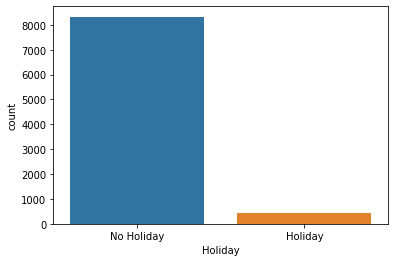

In [ ]:
sns.countplot(df['Holiday'])

**Count of number of rented bikes booked on holiday and normal day**

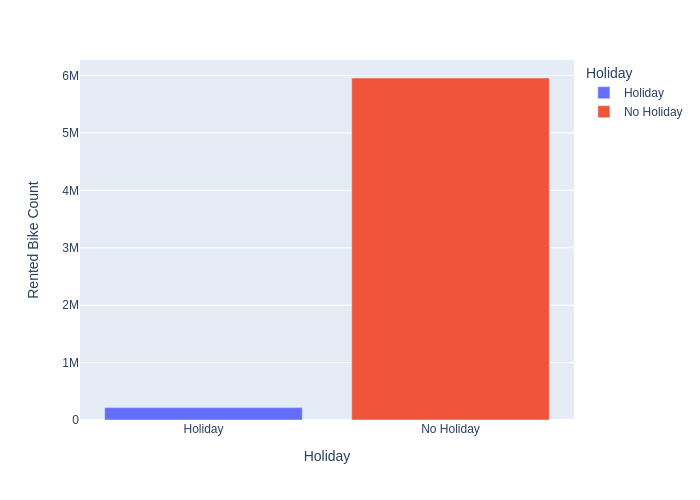

In [ ]:
import plotly.express as px
Holiday = df.groupby("Holiday")['Rented Bike Count'].sum().reset_index()
fig = px.bar(Holiday, x='Holiday', y='Rented Bike Count',color='Holiday')
#fig.show()
fig.show(renderer="png")

**Count of bikes used yearly**

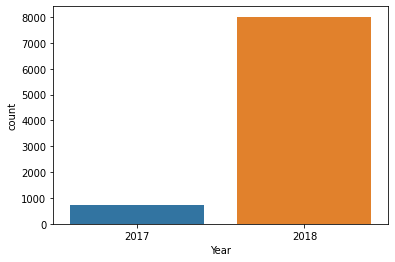

In [ ]:
sns.countplot(x='Year', data=df)

In 2018 rented bike using is higher than used in 2017

**Monthly use of rented bikes**

In [ ]:
Month = df.groupby('Month')['Rented Bike Count'].sum().reset_index()
fig = px.bar(Month , x='Month' , y='Rented Bike Count' , color = 'Month',height=400)
#fig.show()
fig.show(rendered="png", width=2500, height=1000)

**Rental Booking of Bikes done daily**

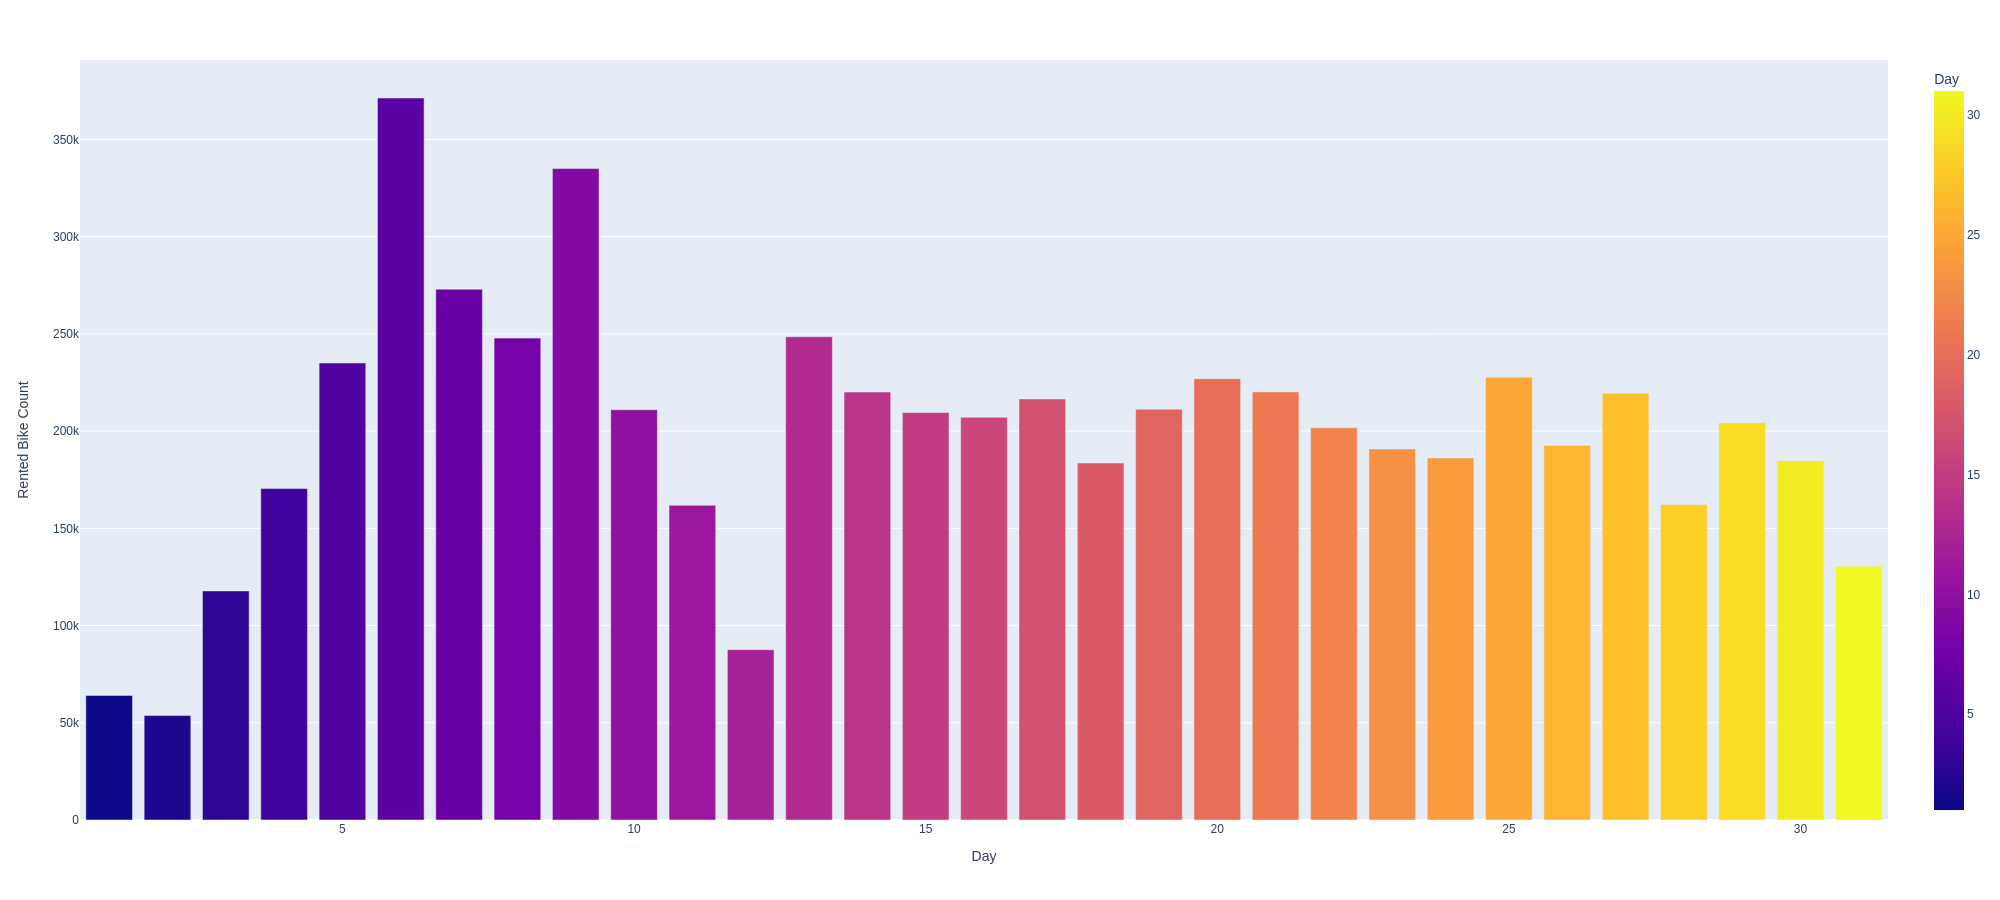

In [ ]:
Day = df.groupby("Day").sum().reset_index()
fig = px.bar(Day, x='Day', y='Rented Bike Count',color= 'Day', height=400)
#fig.show
fig.show(renderer="png",width=2000, height=900)

**Booking of Rental bike done during each Season**

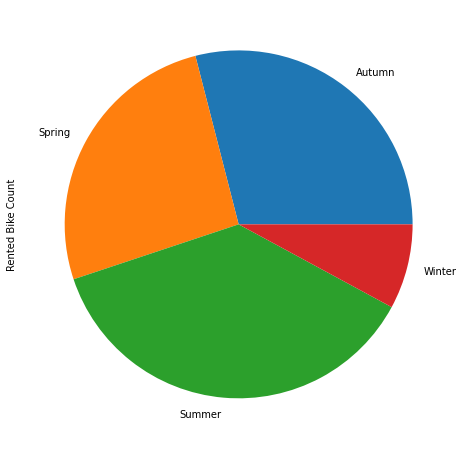

In [ ]:
plt.figure(figsize=(8,8))
df.groupby(["Seasons"])["Rented Bike Count"].sum().plot.pie()


**Booking of Bike for no.of hours during Seasons, Holiday and Functioning Day**

In [ ]:
x=[]
for i in list(df.columns):
  if i not in df[df.describe().columns]:
    x.append(i)
x   

['Seasons', 'Holiday', 'Functioning Day']

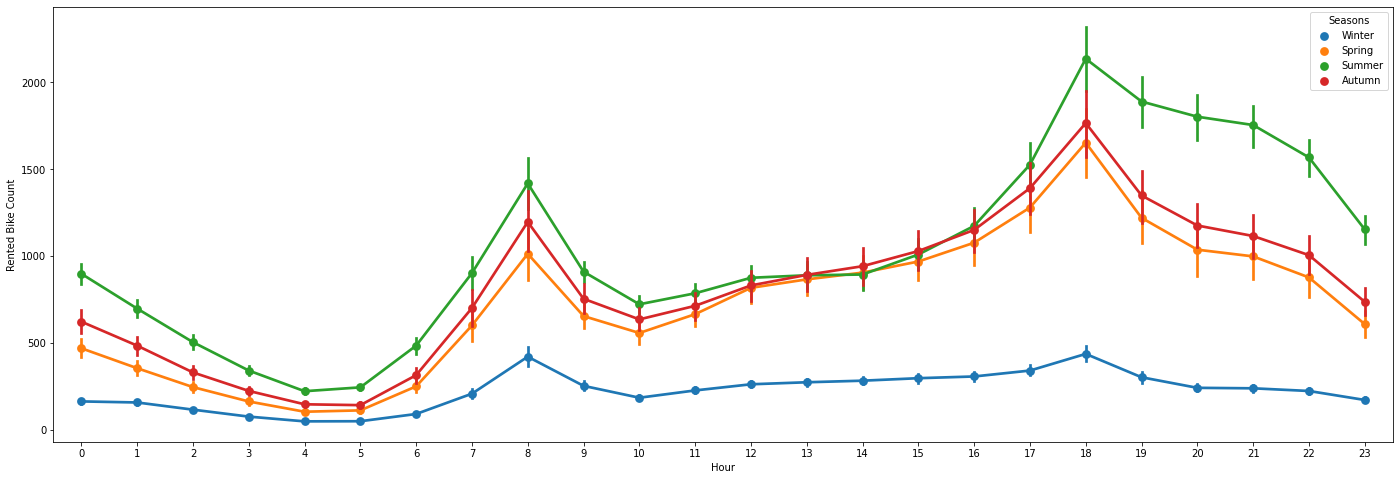

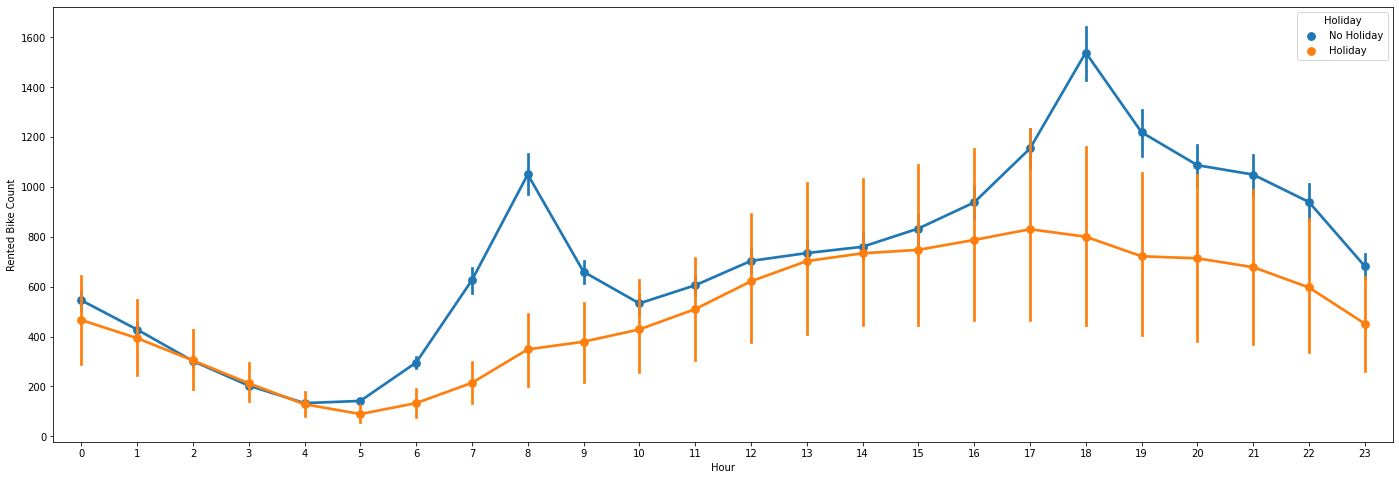

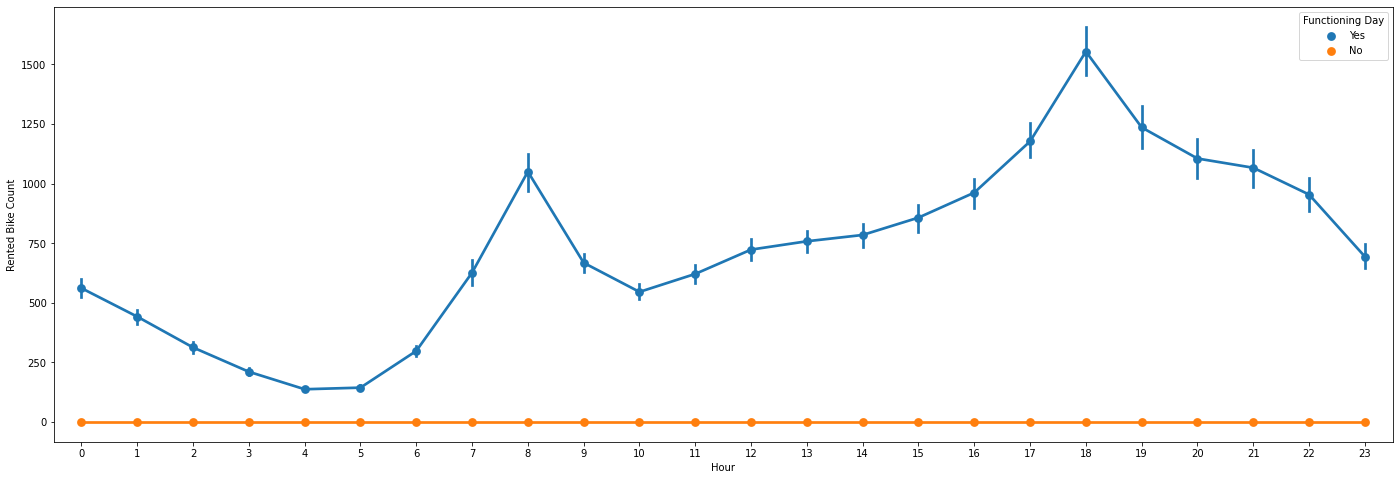

In [ ]:
#x=['Holiday','Seasons', 'Functioning Day']
for i in x:

    plt.figure(figsize=(24,8))
    sns.pointplot(data=df, x="Hour", y="Rented Bike Count", hue=i)

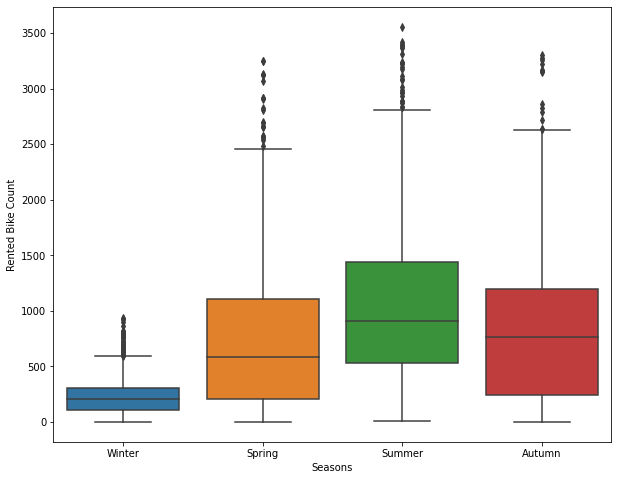

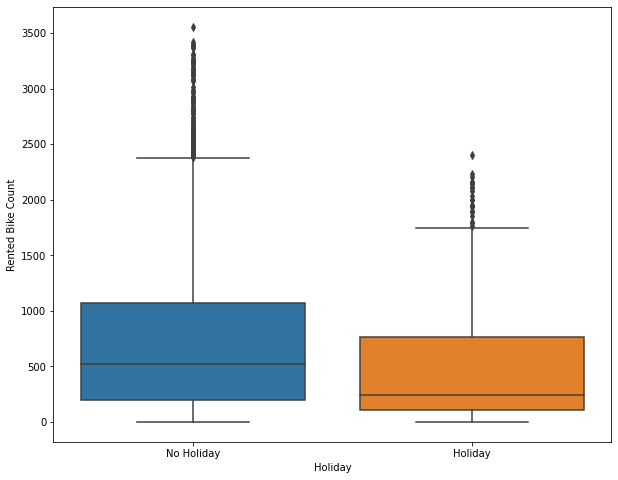

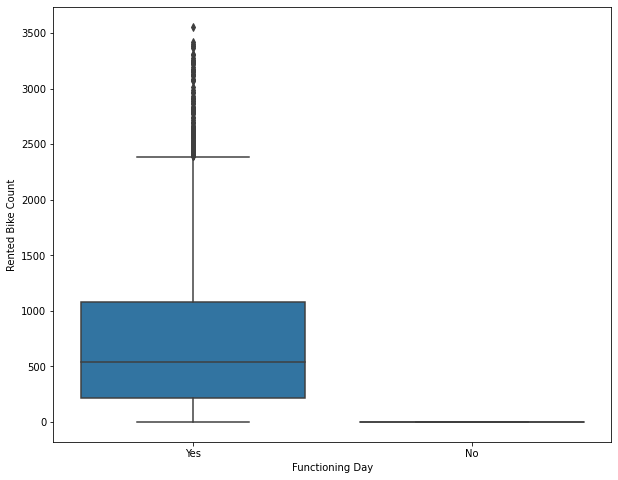

In [ ]:
#Ploting Box plot to visualize and trying to get information from plot
for col in x:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

**Regplot shows the correlation between our bike rent with all other factors**

In [ ]:
x=list(df1.columns)
len(x)

10

[Text(0.5, 1.0, 'Relation between Snowfall and Rented Bike Count')]

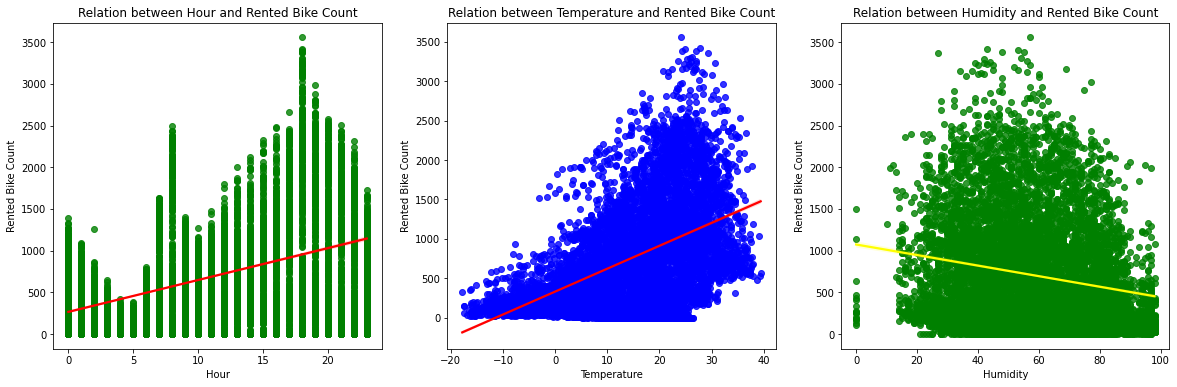

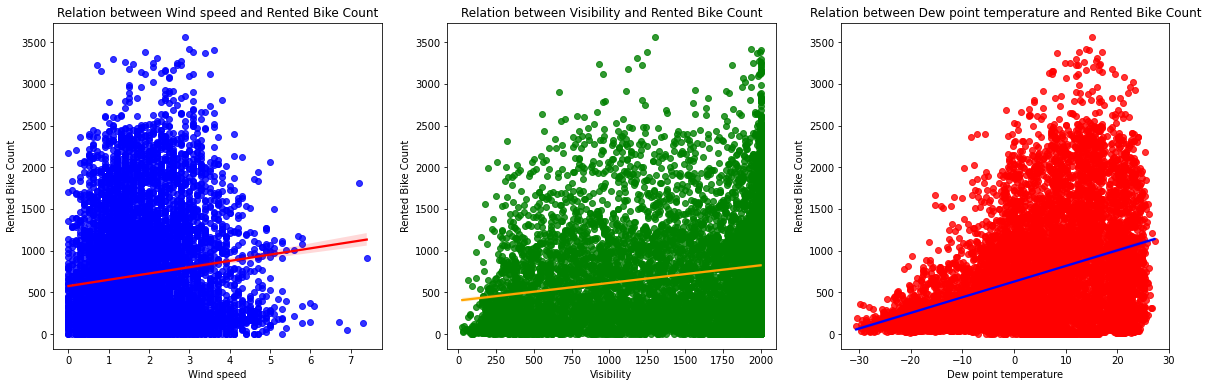

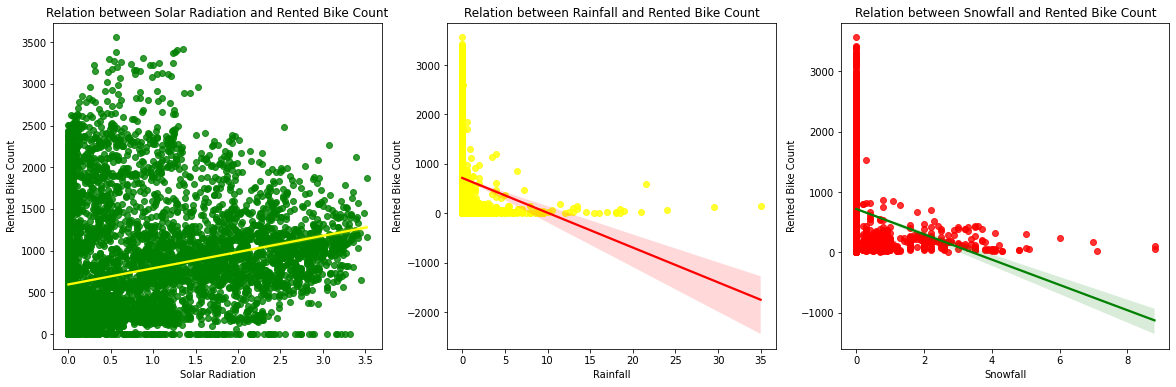

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df[x[1]], y=df['Rented Bike Count'], ax=ax1 ,scatter_kws={"color": "green"}, line_kws={"color": "red"})
ax1.set(title=f"Relation between {x[1]} and Rented Bike Count")
sns.regplot(x=df[x[2]], y=df['Rented Bike Count'], ax=ax2,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax2.set(title=f"Relation between {x[2]} and Rented Bike Count")
sns.regplot(x=df[x[3]], y=df['Rented Bike Count'], ax=ax3, scatter_kws={"color": "green"}, line_kws={"color": "yellow"})
ax3.set(title=f"Relation between {x[3]} and Rented Bike Count")
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df[x[4]], y=df['Rented Bike Count'], ax=ax1 ,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax1.set(title=f"Relation between {x[4]} and Rented Bike Count")
sns.regplot(x=df[x[5]], y=df['Rented Bike Count'], ax=ax2,scatter_kws={"color": "green"}, line_kws={"color": "orange"})
ax2.set(title=f"Relation between {x[5]} and Rented Bike Count")
sns.regplot(x=df[x[6]], y=df['Rented Bike Count'], ax=ax3, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
ax3.set(title=f"Relation between {x[6]} and Rented Bike Count")
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df[x[7]], y=df['Rented Bike Count'], ax=ax1 ,scatter_kws={"color": "green"}, line_kws={"color": "yellow"})
ax1.set(title=f"Relation between {x[7]} and Rented Bike Count")
sns.regplot(x=df[x[8]], y=df['Rented Bike Count'], ax=ax2,scatter_kws={"color": "yellow"}, line_kws={"color": "red"})
ax2.set(title=f"Relation between {x[8]} and Rented Bike Count")
sns.regplot(x=df[x[9]], y=df['Rented Bike Count'], ax=ax3, scatter_kws={"color": "red"}, line_kws={"color": "green"})
ax3.set(title=f"Relation between {x[9]} and Rented Bike Count")

**Correlation Matrix**

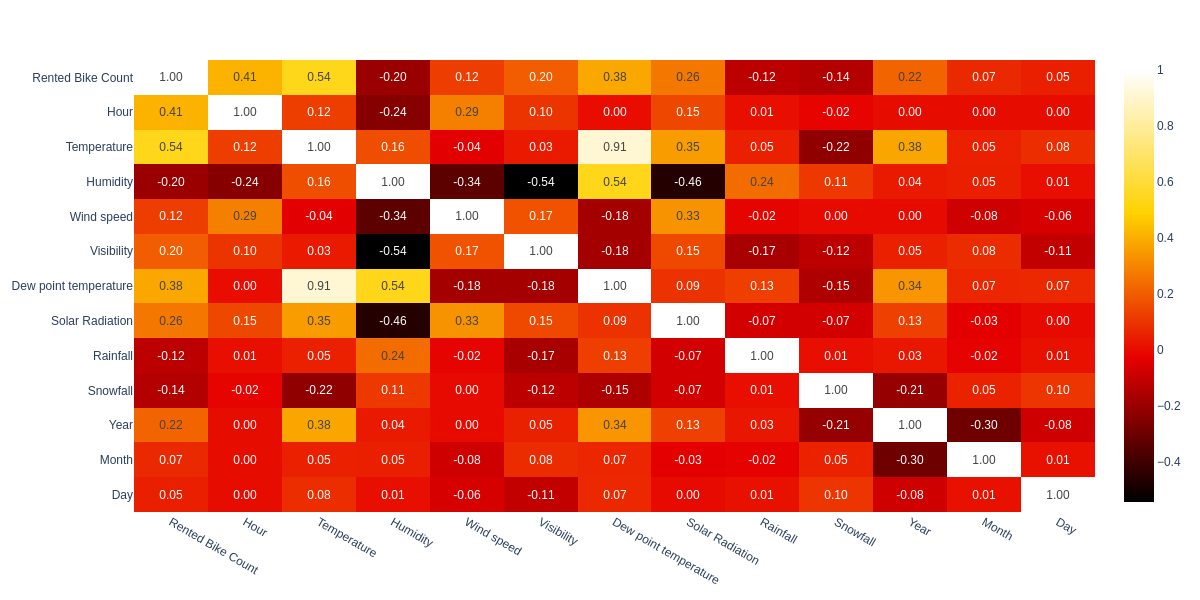

In [ ]:
corr = df.corr()
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='hot', aspect="auto")
# fig.show() 
fig.show(renderer="png",width=1200, height=600)

From the above correlation graph we see that there are High Multicollinearity between temperature and dew point temperature (0.91) so we can add and make them a single temperature column. In 2nd, we see that the day and month are very less correlation with rented bike (0.07), so we have to drop it.

In [ ]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,4.456946
1,Temperature,188.757275
2,Humidity,187.140788
3,Wind speed,4.848147
4,Visibility,10.695216
5,Dew point temperature,127.016687
6,Solar Radiation,2.909493
7,Rainfall,1.103999
8,Snowfall,1.152549
9,Year,407.294385


In [ ]:
### removing multicollear
df['Total_temp'] = 0.7*df['Temperature'] + 0.4*df['Dew point temperature']
df=df.drop(['Temperature','Dew point temperature'],axis=1)

skewness is:- 1.1532306631480034


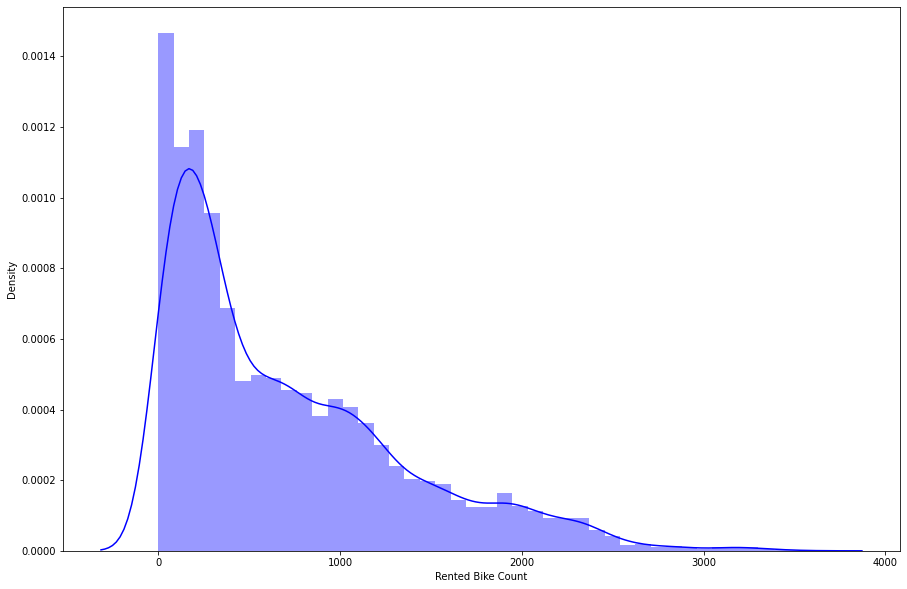

In [ ]:
# Dependent variable 'Price'
from scipy.stats.stats import skew
plt.figure(figsize=(15,10))
sns.distplot(df['Rented Bike Count'],color="b")
print('skewness is:-',skew(df['Rented Bike Count']))

skwness is:- 0.23732144485836718


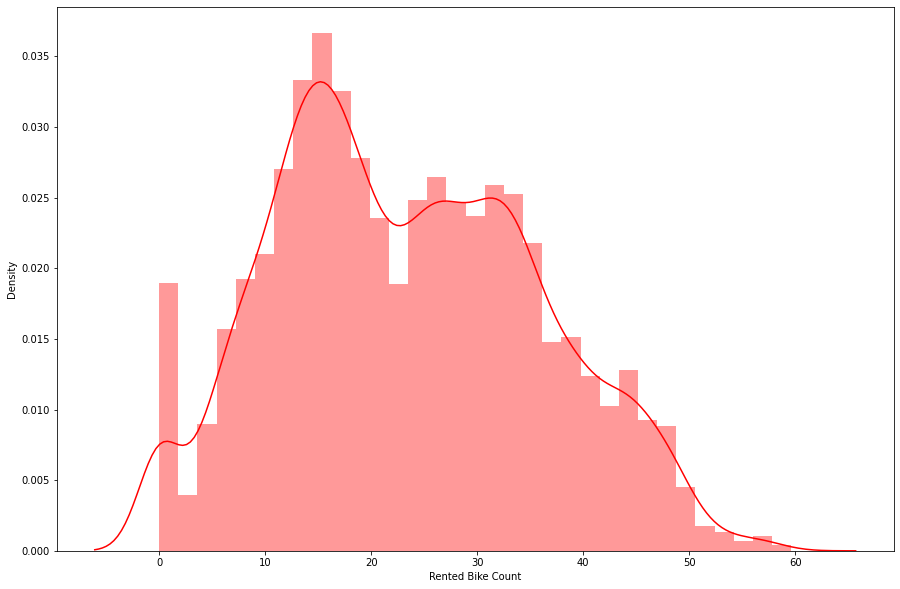

In [ ]:
# from scipy.stats.stats import skew
plt.figure(figsize=(15,10))
sns.distplot(np.sqrt(df['Rented Bike Count']),color="r")
# x=1
print('skwness is:-',skew(np.sqrt(df['Rented Bike Count'])))

**Data Encoding**

In [ ]:
df.columns


Index(['Rented Bike Count', 'Hour', 'Humidity', 'Wind speed', 'Visibility',
       'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday',
       'Functioning Day', 'Year', 'Month', 'Day', 'Total_temp'],
      dtype='object')

In [ ]:
# convert object type data to dumy variables(binary form)
data=df.copy()
x=['Seasons','Holiday','Functioning Day','Month','Hour']
for i in x:
      data = pd.concat([data, pd.get_dummies(data[i], prefix=i, drop_first=True)], axis=1)
      data = data.drop([i], axis=1)
data.drop(['Year','Day'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented Bike Count    8760 non-null   int64  
 1   Humidity             8760 non-null   int64  
 2   Wind speed           8760 non-null   float64
 3   Visibility           8760 non-null   int64  
 4   Solar Radiation      8760 non-null   float64
 5   Rainfall             8760 non-null   float64
 6   Snowfall             8760 non-null   float64
 7   Year                 8760 non-null   int64  
 8   Day                  8760 non-null   int64  
 9   Total_temp           8760 non-null   float64
 10  Seasons_Spring       8760 non-null   uint8  
 11  Seasons_Summer       8760 non-null   uint8  
 12  Seasons_Winter       8760 non-null   uint8  
 13  Holiday_No Holiday   8760 non-null   uint8  
 14  Functioning Day_Yes  8760 non-null   uint8  
 15  Month_2              8760 non-null   u

In [ ]:
#Assign the value in X and Y
x = data.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(data['Rented Bike Count'])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=77)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6570, 48) (6570,)
(2190, 48) (2190,)


**APPLY MACHINE LEARNING MODELS**

**Linear Regression Model**

In [ ]:
train={}
test={}

In [ ]:
# linear regression
reg= LinearRegression().fit(x_train, y_train)

In [ ]:
reg.score(x_train, y_train)

0.7629334199581261

In [ ]:
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

In [ ]:
# metrics for linear regressor for train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Linear regression']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.13314681383164
RMSE : 6.093697302445506
R2 : 0.7629334199581261
Adjusted R2 : 0.7576185223205689


In [ ]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Linear regression']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.273629840755824
RMSE : 6.1052133329438885
R2 : 0.750827145595724
Adjusted R2 : 0.745240832185446


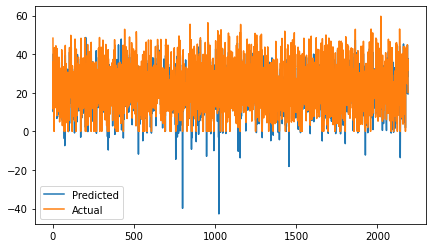

In [ ]:
#Compare between y_pred_test vs original y_test
plt.figure(figsize=(7,4))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Decision tree by using decision tree regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "max_depth" : [7,8,9,10],
          #  "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
          #  "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-41.201 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-48.659 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-44.772 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-58.397 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-52.587 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-53.729 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, splitter=best;, score=-56.361 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, splitter=best;, score=-56.989 total time=   0.0s
[CV 3/3] END ma

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
#importing the decision tree model for training 
decision_regressor =  DecisionTreeRegressor(criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=80,splitter='best')
decision_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_leaf_nodes=80)

In [ ]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(x_train)
y_pred_test_dt = decision_regressor.predict(x_test)

In [ ]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(x_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['DecisionTreeRegressor']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_dt))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.7954152088220128
MSE : 32.04533125397695
RMSE : 5.660859586138571
R2 : 0.7954152088220128
Adjusted R2 : 0.7908285343817777


In [ ]:
#metric for decison tree for test data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['DecisionTreeRegressor']=MSE,RMSE,r2,1-(1-r2_score((y_test), (y_pred_test_dt)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 34.87674360487326
RMSE : 5.90565352902397
R2 : 0.7668502425580742
Adjusted R2 : 0.7616231578512959


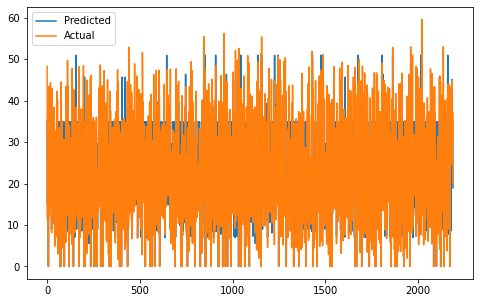

In [ ]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Implementing Xgboost Regressor**

In [ ]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
parameters = {
    'max_depth':  (4,6,8,10),
    # 'n_estimators': (100,200,500,1000,1500),
    'learning_rate': [0.1, 0.01, 0.05,0.09]
}
# 'learning_rate': [0.01,0.02,0.03,0.04],
                  # 'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  # 'n_estimators' : [100,500,1000, 1500],
                  # 'max_depth'    : [4,6,8,10]

In [ ]:
xg_regression=GridSearchCV(xg_model,param_grid=parameters,scoring='roc_auc',cv=5,verbose=3)
xg_regression.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[17:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END ......learning_rate=0.1, max_depth=4;, score=nan total time=   1.5s
[17:00:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END ......learning_rate=0.1, max_depth=4;, score=nan total time=   0.8s
[17:00:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END ......learning_rate=0.1, max_depth=4;, score=nan total time=   0.7s
[17:00:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END ......learning_rate=0.1, max_depth=4;, score=nan total time=   0.7s
[17:00:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.05, 0.09],
                         'max_depth': (4, 6, 8, 10)},
             scoring='roc_auc', verbose=3)

In [ ]:
xg_regression.best_params_
# xg_regression.best_estimator_

{'learning_rate': 0.1, 'max_depth': 4}

In [ ]:
xg_regression.best_estimator_
xg_optimal_model = xg_regression.best_estimator_
# xg_grid.best_params_
# Making predictions on train and test data

y_pred_train_x_g = xg_optimal_model.predict(x_train)
y_pred_test_x_g  = xg_optimal_model.predict(x_test)

In [ ]:
#xg boost after training score for train data
print("Model Score:",xg_optimal_model.score(x_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_train, y_pred_train_x_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_x_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['XGBoost']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_x_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.892549996227313
MSE : 16.830532437483136
RMSE : 4.102503191648135
R2 : 0.892549996227313
Adjusted R2 : 0.8901410283706623


In [ ]:
#Xg boost  after training for test
print("Model Score:",xg_optimal_model.score(x_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_x_g))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_x_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['XGBoost']=MSE,RMSE,r2,1-(1-r2_score((y_test), (y_pred_test_x_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.892549996227313
MSE : 19.446866450146597
RMSE : 4.4098601395221815
R2 : 0.8699984079011416
Adjusted R2 : 0.8670838462847262


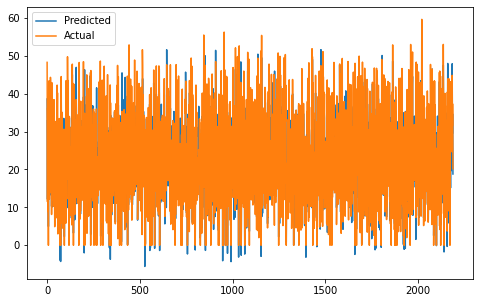

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_x_g))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbd_model=GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  # 'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  # 'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [ ]:
gb_regression=GridSearchCV(gbd_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)
gb_regression.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .learning_rate=0.01, max_depth=4;, score=-66.110 total time=   1.2s
[CV 2/5] END .learning_rate=0.01, max_depth=4;, score=-69.361 total time=   1.2s
[CV 3/5] END .learning_rate=0.01, max_depth=4;, score=-69.738 total time=   1.2s
[CV 4/5] END .learning_rate=0.01, max_depth=4;, score=-72.461 total time=   1.2s
[CV 5/5] END .learning_rate=0.01, max_depth=4;, score=-65.447 total time=   1.2s
[CV 1/5] END .learning_rate=0.01, max_depth=6;, score=-53.354 total time=   1.7s
[CV 2/5] END .learning_rate=0.01, max_depth=6;, score=-55.991 total time=   1.7s
[CV 3/5] END .learning_rate=0.01, max_depth=6;, score=-56.694 total time=   1.7s
[CV 4/5] END .learning_rate=0.01, max_depth=6;, score=-59.614 total time=   1.7s
[CV 5/5] END .learning_rate=0.01, max_depth=6;, score=-52.680 total time=   1.7s
[CV 1/5] END .learning_rate=0.01, max_depth=8;, score=-45.057 total time=   2.2s
[CV 2/5] END .learning_rate=0.01, max_depth=8;, 

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
gb_optimal_model = gb_regression.best_estimator_


In [ ]:
# Making predictions on train and test data

y_pred_train_gb = gb_optimal_model.predict(x_train)
y_pred_test_gb = gb_optimal_model.predict(x_test)

In [ ]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(x_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['GradientBoostingRegressor']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.9686919292669736
MSE : 4.903969116110541
RMSE : 2.2144907125816853
R2 : 0.9686919292669736
Adjusted R2 : 0.9679900201613288


In [ ]:
#metrics for rf score with gd for test
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(x_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_gb)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['GradientBoostingRegressor']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.8923890148887208
MSE : 16.097467902057613
RMSE : 4.012164989386355
R2 : 0.8923890148887208
Adjusted R2 : 0.8899764379221905


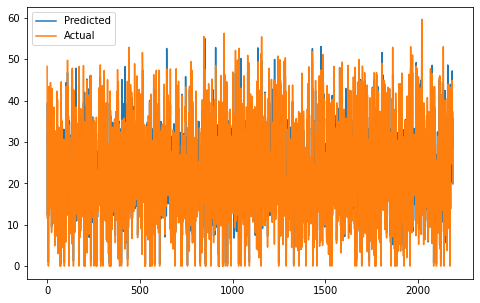

In [ ]:
#pred vs actual for Gradient boosting
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_gb)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Random forest Rergressor**

In [ ]:
# Hyperparameter tuning

from sklearn.ensemble import RandomForestRegressor
# random_forest=RandomForestRegressor() # For GBM, use GradientBoostingClassifier()
# grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
# #n_estimators=no of trees
# #max_depth=How much maximum depth the d-tree is goes
# random_forest= GridSearchCV(random_forest, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# # Fit the object to train dataset
# random_forest.fit(x_train, y_train)
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
# print(rf_model.best_params_)
# rf_model.best_score_

In [ ]:
# y_pred_train_rf = random_forest.predict(x_train)
# y_pred_test_rf = random_forest.predict(x_test)
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)

In [ ]:
#metric score for the rf for train dataset
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(x_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Random_forest']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.985270931357345
MSE : 2.3071015249897426
RMSE : 1.518914587786207
R2 : 0.985270931357345
Adjusted R2 : 0.9849407140314004


In [ ]:
# test random forest
print("Model Score:",rf_model.score(x_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Random_forest']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.8924122146622735
MSE : 16.093997460729398
RMSE : 4.0117324762164035
R2 : 0.8924122146622735
Adjusted R2 : 0.8900001578214464


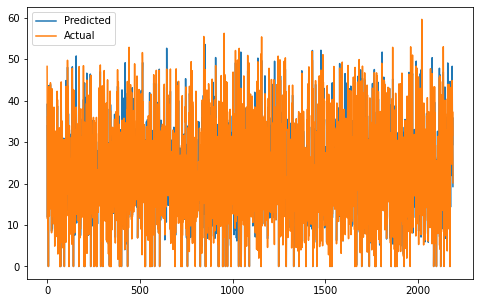

In [ ]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Implementing Lasso Regression**

In [ ]:
#importing lasso regression model
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso,parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -37.936072286585855


In [ ]:
lasso=Lasso(alpha=0.001,max_iter=3000)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:
# lasso score 
lasso.score(x_train, y_train)

0.7629142641092735

In [ ]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

In [ ]:
# metrics for lasso regressor for train data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Lasso Regressor']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.13314681383164
RMSE : 6.093697302445506
R2 : 0.7629334199581261
Adjusted R2 : 0.7576185223205689


In [ ]:
# metrics for lasso regression for test data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Lasso regression']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.18201422405232
RMSE : 6.097705652460794
R2 : 0.7514395926479578
Adjusted R2 : 0.7458670099516018


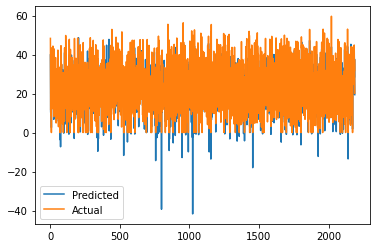

In [ ]:
#plot for lasso
plt.figure(figsize=(6,4))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Implementing Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -38.06587599355925


In [ ]:
ridge= Ridge(alpha=0.01)
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [ ]:
ridge.score(x_train, y_train)

0.762933381019659

In [ ]:
#y prediction  ridge test and train
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

In [ ]:
# metrics for ridge regression for train
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Ridge regreson']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.13315291299508
RMSE : 6.093697802893993
R2 : 0.762933381019659
Adjusted R2 : 0.7576184825091236


In [ ]:
# metrics for ridge regression for test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Ridge regreson']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.26764694572256
RMSE : 6.104723330808904
R2 : 0.7508671410305504
Adjusted R2 : 0.7452817242951307


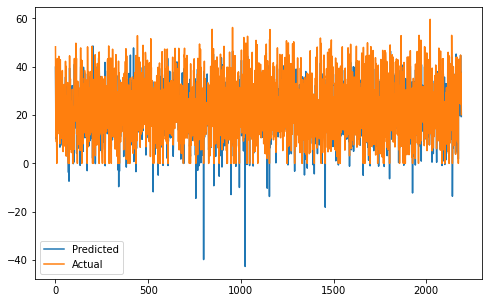

In [ ]:
#plot for ridge 
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Implementing Elastic Net Regressor**

In [ ]:
#importing elasticNet model
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)
 
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.001)

In [ ]:
elasticnet.score(x_train, y_train)

0.7607200535243308

In [ ]:
#y_predict for train and test dataset
y_pred_train_en=elasticnet.predict(x_train)
y_pred_test_en=elasticnet.predict(x_test)

In [ ]:
#metrics for the elasticnet regression on train
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['ElasticNet']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.47983954768055
RMSE : 6.122078041619573
R2 : 0.7607200535243308
Adjusted R2 : 0.7553555334725643


In [ ]:
#metrics for the elasticnet regression on test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['ElasticNet']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 36.469868314473736
RMSE : 6.039028755890614
R2 : 0.756200262048822
Adjusted R2 : 0.7507344108476746


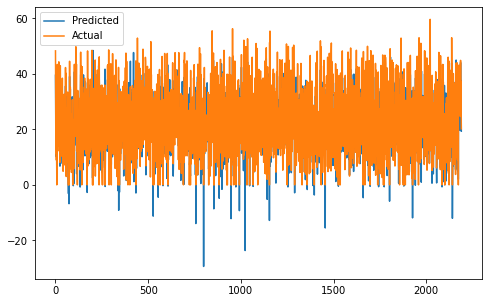

In [ ]:
#plot for pred vs actual for test
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Comparing all Models**

In [ ]:
Test=pd.DataFrame(test,index=["Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
Train=pd.DataFrame(train,index=["Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])

In [ ]:
Test.transpose()

,Test MSE,Test RMSE,Test R^2,Test Adjusted R^2
Linear regression,37.273630,6.105213,0.750827,0.745241
DecisionTreeRegressor,34.876744,5.905654,0.766850,0.761623
XGBoost,19.446866,4.409860,0.869998,0.867084
GradientBoostingRegressor,16.097468,4.012165,0.892389,0.889976
Random_forest,16.093997,4.011732,0.892412,0.890000
Lasso regression,37.182014,6.097706,0.751440,0.745867
Ridge regreson,37.267647,6.104723,0.750867,0.745282
ElasticNet,36.469868,6.039029,0.756200,0.750734


In [ ]:
Train.transpose()

,Train MSE,Train RMSE,Train R^2,Train Adjusted R^2
Linear regression,37.133147,6.093697,0.762933,0.757619
DecisionTreeRegressor,32.045331,5.660860,0.795415,0.790829
XGBoost,16.830532,4.102503,0.892550,0.890141
GradientBoostingRegressor,4.903969,2.214491,0.968692,0.967990
Random_forest,2.307102,1.518915,0.985271,0.984941
Lasso Regressor,37.133147,6.093697,0.762933,0.757619
Ridge regreson,37.133153,6.093698,0.762933,0.757618
ElasticNet,37.479840,6.122078,0.760720,0.755356
